In [1]:
import torch, scipy
from scipy import signal

In [4]:
def randconv(shape, kshape, rand_sampler = torch.randn, conv_sampler = torch.randn):
    return torch.from_numpy(signal.convolve(rand_sampler(shape), conv_sampler(kshape), mode='same'))

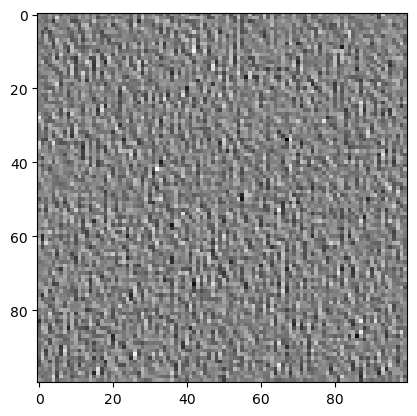

In [24]:
import matplotlib.pyplot as plt
from glio.transforms import norm_to01
x = randconv((100,100), (3,3))
plt.imshow(norm_to01(x), cmap='gray')

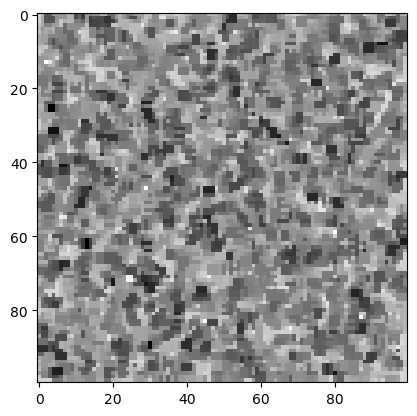

In [61]:
x = norm_to01(signal.order_filter(torch.randn(100,100), torch.randn(3,3), 1))
plt.imshow(x, cmap='gray')

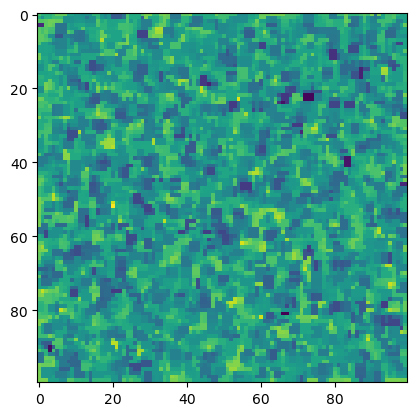

In [62]:
def randorder(shape, kshape, rank = 1, rand_sampler = torch.randn, conv_sampler = torch.randn):
    """Generates a random tensor of shape `shape` and uses scipy.signal.order_filter with random tensor of shape kshaspe`"""
    return torch.from_numpy(signal.order_filter(rand_sampler(shape), conv_sampler(kshape), rank=rank))
def randorder_like(x:torch.Tensor, kshape, rand_sampler = torch.randn, conv_sampler = torch.randn, dtype=None, device=None,requires_grad=False):
    """Generates a random tensor of shape `shape` and scipy.signal.convolve with random tensor of shape kshaspe"""
    return randorder(x.shape, kshape, rank = 1, rand_sampler=rand_sampler, conv_sampler=conv_sampler).to(dtype=dtype, device=device).requires_grad_(requires_grad)
plt.imshow(randorder_like(x, (3,3)))

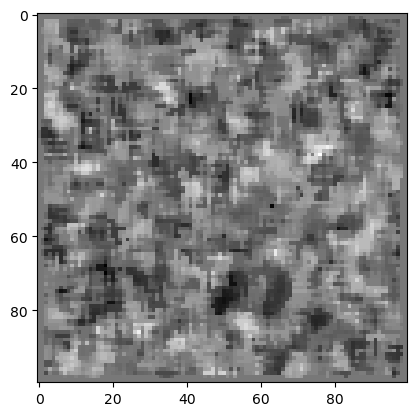

In [64]:
x = norm_to01(signal.medfilt(torch.randn(100,100), (5,5)))
plt.imshow(x, cmap='gray')

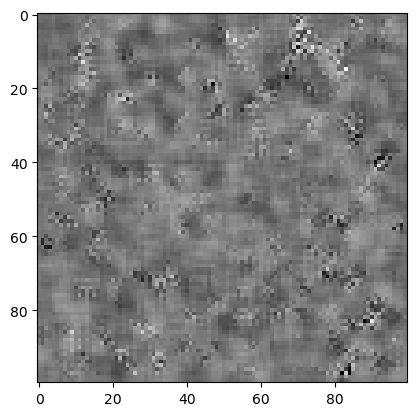

In [70]:
x = norm_to01(signal.wiener(torch.randn(100,100), (5,5)))
plt.imshow(x, cmap='gray')

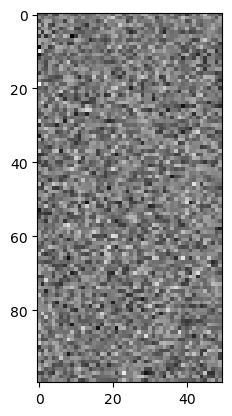

In [79]:
x = norm_to01(signal.decimate(torch.randn(100,100), 2))
plt.imshow(x, cmap='gray')  

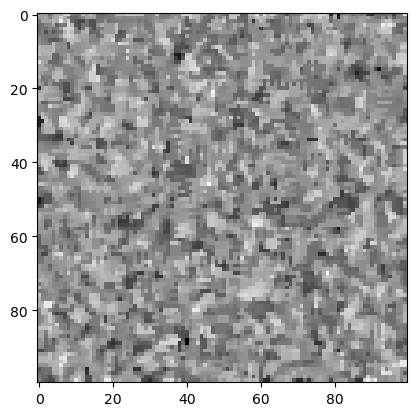

In [11]:
from scipy import signal, ndimage
import matplotlib.pyplot as plt
from glio.transforms import norm_to01
import torch
def randmedian(shape, kshape, mode='reflect', sampler = torch.randn):
    """Generates a random tensor of shape `shape` and uses scipy.signal.medfilt`"""
    return torch.from_numpy(ndimage.median_filter(sampler(shape), kshape, mode=mode))

def randmedian_like(x:torch.Tensor, kshape, mode='reflect', sampler = torch.randn, dtype=None, device=None,requires_grad=False):
    """Generates a random tensor of shape `shape` and scipy.signal.medfilt"""
    return randmedian(x.shape, kshape, sampler=sampler, mode=mode).to(dtype=dtype, device=device).requires_grad_(requires_grad)

x = torch.randn(100,100)
plt.imshow(norm_to01(randmedian_like(x, (3,3))), cmap='gray')

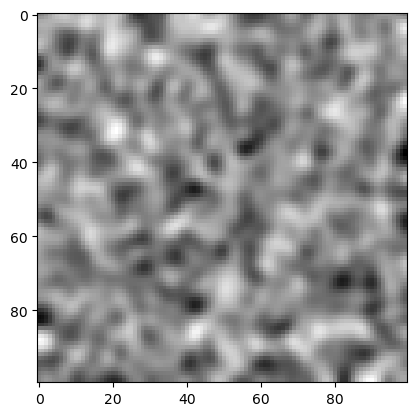

In [2]:
from scipy import signal, ndimage
import matplotlib.pyplot as plt
from glio.transforms import norm_to01
import torch
def randgaussian(shape, sigma=2, order=0, mode='reflect', sampler = torch.randn):
    """Generates a random tensor of shape `shape` and uses scipy.signal.medfilt`"""
    return torch.from_numpy(ndimage.gaussian_filter(sampler(shape), sigma=sigma, order=order, mode=mode))

def randgaussian_like(x:torch.Tensor, sigma=2, order=0, mode='reflect', sampler = torch.randn, dtype=None, device=None,requires_grad=False):
    """Generates a random tensor of shape `shape` and scipy.signal.medfilt"""
    return randgaussian(x.shape, sigma=sigma, order=order, mode=mode, sampler=sampler).to(dtype=dtype, device=device).requires_grad_(requires_grad)

x = torch.randn(100,100)
plt.imshow(norm_to01(randgaussian_like(x, 2)), cmap='gray')

In [4]:
x.std()

tensor(1.0097)